# Missing Data Tools Showcase
This notebook walks through a cool Python library called [MissingNo](https://github.com/ResidentMario/missingno) for identifying NaN and missing values in a dataset. Another library, [fancyimpute](https://pypi.org/project/fancyimpute/), provides additional methods for imputing those missing values.

In [1]:
# Custom Python Modules
import missing_data_prep as dc
from fancyimpute import IterativeImputer, KNN
import missingno as msno

# Data Containers
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


## Missing values are present in nearly all of the 170+ feature columns

Nearly all of the data preparation steps shown in the EDA notebook have been condensed into a separate module, `data_cleaning.py`. I've been more strategic about dealing with missing data, and think this approach sets up a system I can use in the future as well for abstracting the process of reading in data.


The two libraries are great for dealing with NaN values:
* Identify missing values and correlations between when certain features are missing
* Impute missing data when using the mean or default value will not suffice

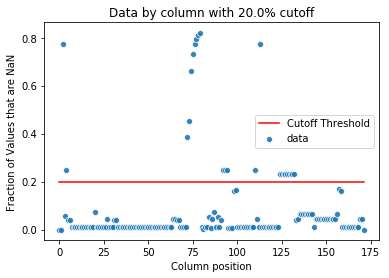

In [2]:
# Bring in data from csv files
X_train, X_test, y_train, y_test = dc.ready_aps_data()

In [3]:
# Review dataframe specs after mostly NaN value columns are dropped
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, aa_000 to n_missing
dtypes: float64(169), int64(2)
memory usage: 78.3 MB


In [4]:
# How many individual value are we still missing?
X_train.isnull().sum().sum()

850015

The visualization below is useful for identifying which columns are missing values, and where those missing values are within the data itself. This can be useful when aggregating data from multiple source files and dealing with NaN values caused by different file formats: identifying where the NaN values are is a clue for where the answer can be found in the source files.  

The y-axis is the row in the dataframe, and the x-axis corresponds to a sub-sample of 25 features. The white lines correspond to missing values.

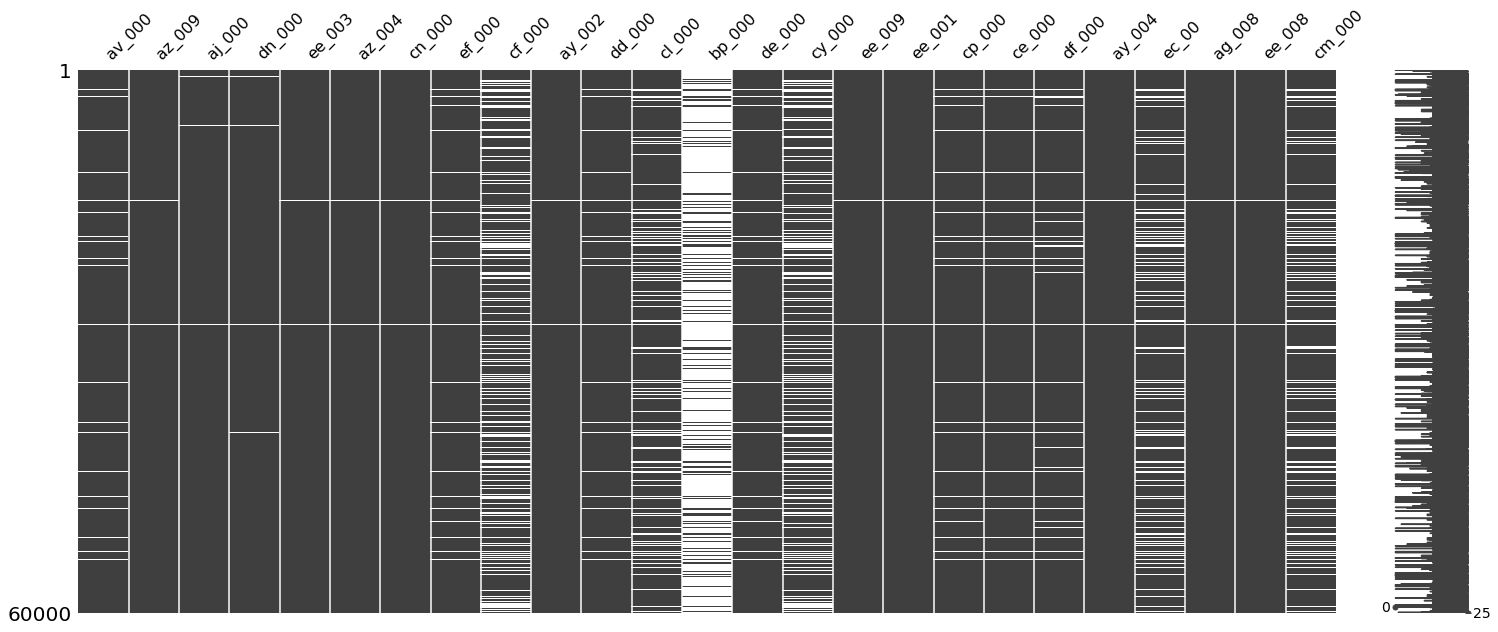

In [5]:
# Visualize missing data
msno.matrix(X_train.sample(n=25, axis=1))

In [6]:
# Drop columns with mostly missing data
data = X_train.drop(columns = dc.get_nan_frac_cols(X_train))
print('Dropped {} columns from dataframe'.format(X_train.shape[1]-data.shape[1] ))

Dropped 24 columns from dataframe


In [7]:
# How many individual measurements are we still missing?
data.isnull().sum().sum()

232852

The nullity correlation matrix here shows relationships between missing values. A negative value means that the prescence of one variable is correlated with the abscence of another, while a positive value implies that their appearance is strongly correlated. Values can range from -1 to 1.

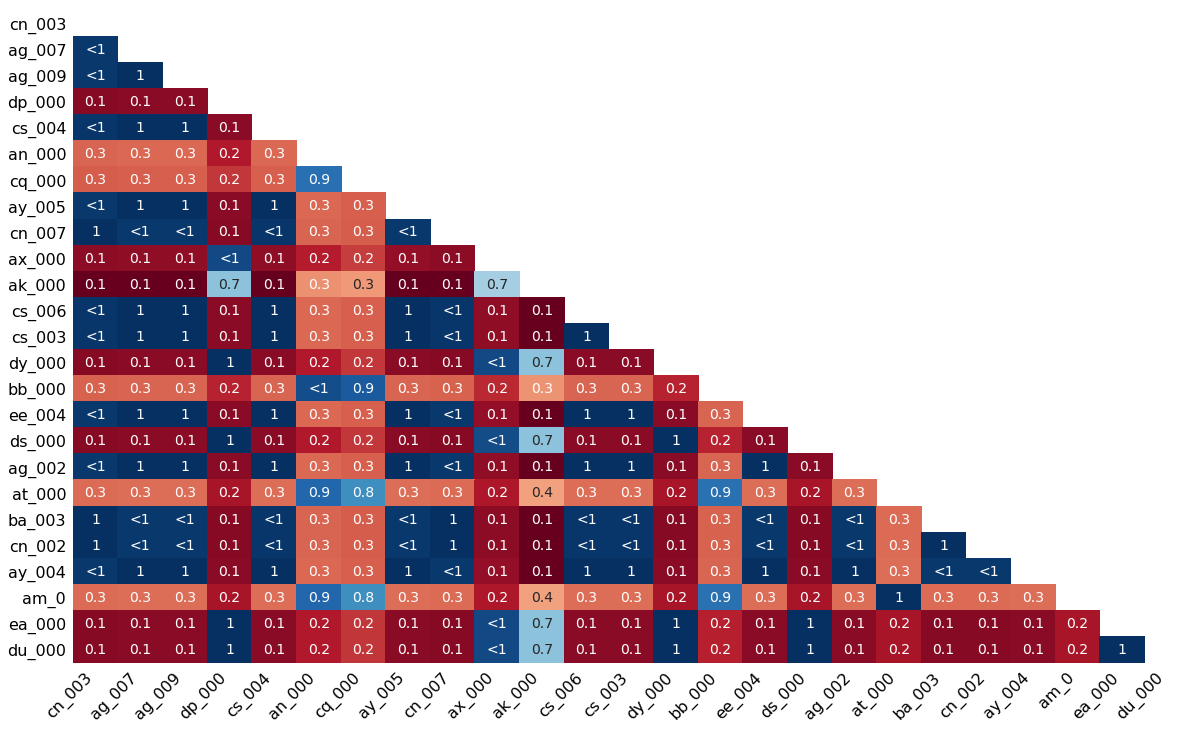

In [8]:
# Visualize correlations in missing data from a subset of the feature space
msno.heatmap(data.sample(n=25, axis=1))

In [9]:
# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).fit_transform(data.sample(n=25,axis=1))

Imputing row 1/60000 with 0 missing, elapsed time: 1979.149
Imputing row 101/60000 with 0 missing, elapsed time: 1980.071
Imputing row 201/60000 with 0 missing, elapsed time: 1980.602
Imputing row 301/60000 with 0 missing, elapsed time: 1980.993
Imputing row 401/60000 with 0 missing, elapsed time: 1981.225
Imputing row 501/60000 with 0 missing, elapsed time: 1981.530
Imputing row 601/60000 with 0 missing, elapsed time: 1981.675
Imputing row 701/60000 with 0 missing, elapsed time: 1981.792
Imputing row 801/60000 with 0 missing, elapsed time: 1982.012
Imputing row 901/60000 with 0 missing, elapsed time: 1982.324
Imputing row 1001/60000 with 0 missing, elapsed time: 1982.406
Imputing row 1101/60000 with 0 missing, elapsed time: 1982.601
Imputing row 1201/60000 with 0 missing, elapsed time: 1982.809
Imputing row 1301/60000 with 0 missing, elapsed time: 1982.922
Imputing row 1401/60000 with 0 missing, elapsed time: 1983.113
Imputing row 1501/60000 with 8 missing, elapsed time: 1983.204
Impu

Imputing row 13301/60000 with 0 missing, elapsed time: 1991.675
Imputing row 13401/60000 with 0 missing, elapsed time: 1991.721
Imputing row 13501/60000 with 25 missing, elapsed time: 1991.767
Imputing row 13601/60000 with 8 missing, elapsed time: 1991.796
Imputing row 13701/60000 with 0 missing, elapsed time: 1991.846
Imputing row 13801/60000 with 0 missing, elapsed time: 1991.904
Imputing row 13901/60000 with 0 missing, elapsed time: 1991.969
Imputing row 14001/60000 with 0 missing, elapsed time: 1992.052
Imputing row 14101/60000 with 0 missing, elapsed time: 1992.125
Imputing row 14201/60000 with 0 missing, elapsed time: 1992.294
Imputing row 14301/60000 with 0 missing, elapsed time: 1992.420
Imputing row 14401/60000 with 0 missing, elapsed time: 1992.443
Imputing row 14501/60000 with 0 missing, elapsed time: 1992.485
Imputing row 14601/60000 with 0 missing, elapsed time: 1992.555
Imputing row 14701/60000 with 0 missing, elapsed time: 1992.613
Imputing row 14801/60000 with 0 missing

Imputing row 26301/60000 with 5 missing, elapsed time: 2000.852
Imputing row 26401/60000 with 0 missing, elapsed time: 2000.892
Imputing row 26501/60000 with 0 missing, elapsed time: 2000.925
Imputing row 26601/60000 with 0 missing, elapsed time: 2001.071
Imputing row 26701/60000 with 0 missing, elapsed time: 2001.189
Imputing row 26801/60000 with 0 missing, elapsed time: 2001.308
Imputing row 26901/60000 with 0 missing, elapsed time: 2001.379
Imputing row 27001/60000 with 0 missing, elapsed time: 2001.468
Imputing row 27101/60000 with 0 missing, elapsed time: 2001.577
Imputing row 27201/60000 with 0 missing, elapsed time: 2001.686
Imputing row 27301/60000 with 0 missing, elapsed time: 2001.766
Imputing row 27401/60000 with 0 missing, elapsed time: 2001.938
Imputing row 27501/60000 with 0 missing, elapsed time: 2001.991
Imputing row 27601/60000 with 0 missing, elapsed time: 2002.035
Imputing row 27701/60000 with 0 missing, elapsed time: 2002.061
Imputing row 27801/60000 with 0 missing,

Imputing row 39101/60000 with 0 missing, elapsed time: 2009.433
Imputing row 39201/60000 with 0 missing, elapsed time: 2009.482
Imputing row 39301/60000 with 0 missing, elapsed time: 2009.509
Imputing row 39401/60000 with 0 missing, elapsed time: 2009.635
Imputing row 39501/60000 with 0 missing, elapsed time: 2009.669
Imputing row 39601/60000 with 0 missing, elapsed time: 2009.735
Imputing row 39701/60000 with 0 missing, elapsed time: 2009.798
Imputing row 39801/60000 with 0 missing, elapsed time: 2009.818
Imputing row 39901/60000 with 0 missing, elapsed time: 2009.883
Imputing row 40001/60000 with 0 missing, elapsed time: 2009.949
Imputing row 40101/60000 with 0 missing, elapsed time: 2009.991
Imputing row 40201/60000 with 0 missing, elapsed time: 2010.055
Imputing row 40301/60000 with 0 missing, elapsed time: 2010.085
Imputing row 40401/60000 with 0 missing, elapsed time: 2010.119
Imputing row 40501/60000 with 0 missing, elapsed time: 2010.158
Imputing row 40601/60000 with 0 missing,

Imputing row 51901/60000 with 0 missing, elapsed time: 2017.467
Imputing row 52001/60000 with 0 missing, elapsed time: 2017.527
Imputing row 52101/60000 with 0 missing, elapsed time: 2017.585
Imputing row 52201/60000 with 0 missing, elapsed time: 2017.608
Imputing row 52301/60000 with 0 missing, elapsed time: 2017.660
Imputing row 52401/60000 with 0 missing, elapsed time: 2017.756
Imputing row 52501/60000 with 0 missing, elapsed time: 2017.837
Imputing row 52601/60000 with 0 missing, elapsed time: 2017.918
Imputing row 52701/60000 with 0 missing, elapsed time: 2017.991
Imputing row 52801/60000 with 8 missing, elapsed time: 2018.081
Imputing row 52901/60000 with 0 missing, elapsed time: 2018.135
Imputing row 53001/60000 with 0 missing, elapsed time: 2018.178
Imputing row 53101/60000 with 0 missing, elapsed time: 2018.260
Imputing row 53201/60000 with 0 missing, elapsed time: 2018.278
Imputing row 53301/60000 with 2 missing, elapsed time: 2018.366
Imputing row 53401/60000 with 0 missing,

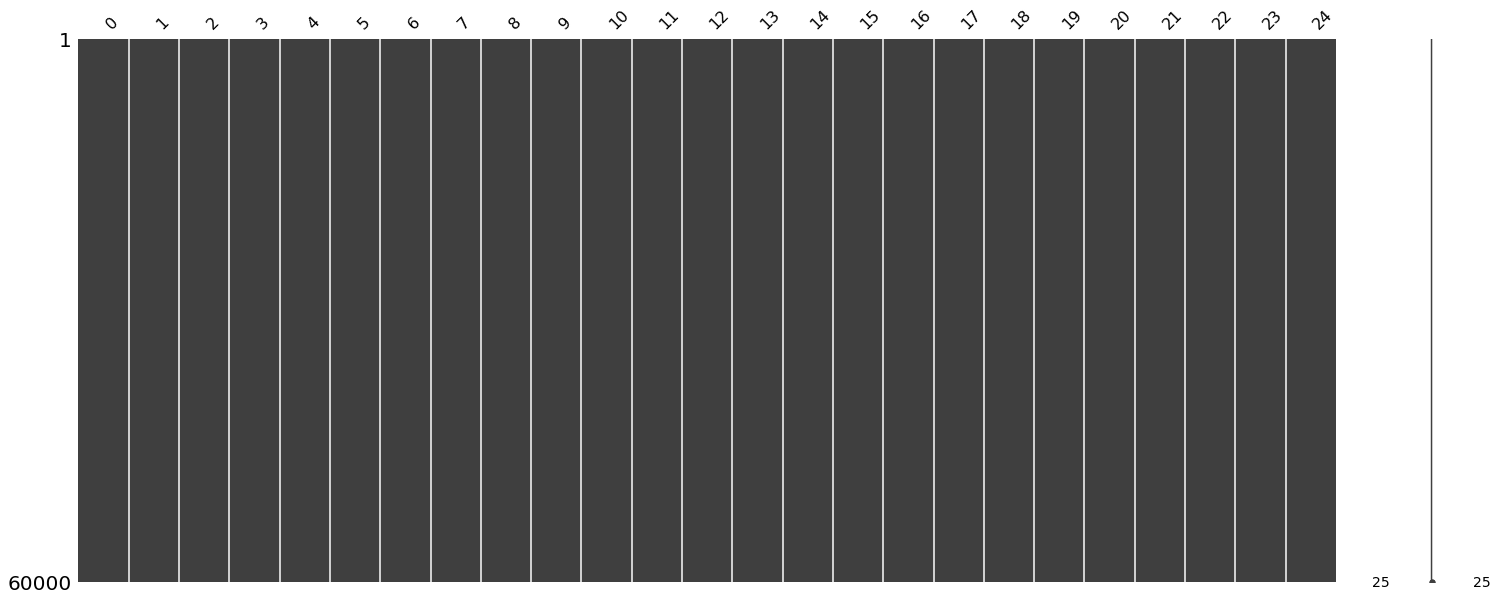

In [15]:
# Visualize (lack of) missing data
X_filled_knn_df = pd.DataFrame(data=X_filled_knn)
msno.matrix(X_filled_knn_df)